In [7]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, precision_score,recall_score, f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from matplotlib.legend_handler import HandlerLine2D

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('Preprocessed_02.csv', index_col='Customer_No')

In [4]:
X = df.drop(columns='Target_Flag')
y = df['Target_Flag']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [9]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Decision Tree auc: 0.531 +/- 0.003


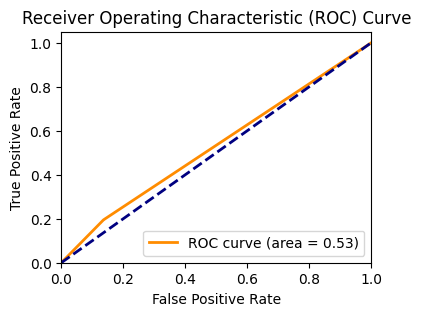

Accuracy (None): 78.32%


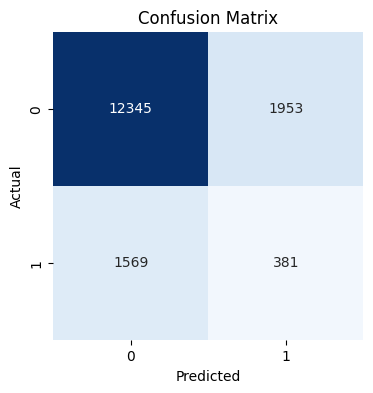

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.89      0.86      0.88     14298
           1       0.16      0.20      0.18      1950

    accuracy                           0.78     16248
   macro avg       0.53      0.53      0.53     16248
weighted avg       0.80      0.78      0.79     16248

Accuracy: 0.783
Precision: 0.163
Recall: 0.195
F1-score: 0.178



In [10]:
# Initialize the models
models = {
    
    'Decision Tree': DecisionTreeClassifier()
   
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Random Forest auc: 0.641 +/- 0.004


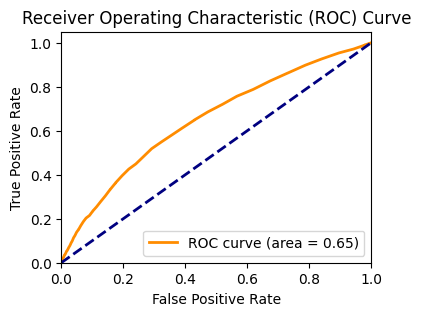

Accuracy (None): 87.82%


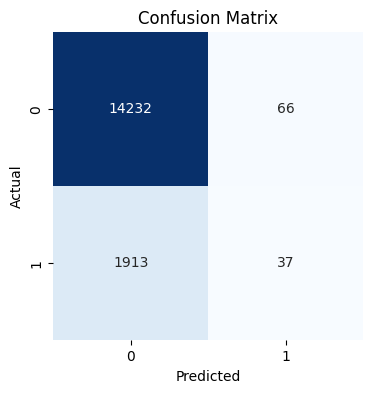

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     14298
           1       0.36      0.02      0.04      1950

    accuracy                           0.88     16248
   macro avg       0.62      0.51      0.49     16248
weighted avg       0.82      0.88      0.83     16248

Accuracy: 0.878
Precision: 0.359
Recall: 0.019
F1-score: 0.036



In [11]:
# Initialize the models
models = {
    
    'Random Forest': RandomForestClassifier()
   
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [13]:
ros = RandomOverSampler(random_state=0)

X_train, y_train = ros.fit_resample(X_train, y_train)


Random Forest auc: 1.000 +/- 0.001


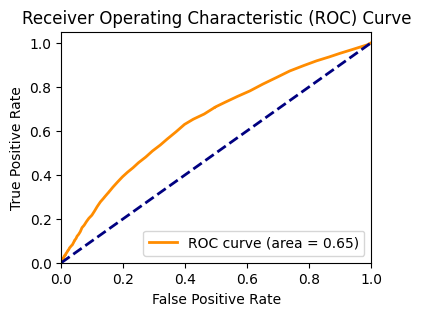

Accuracy (None): 86.87%


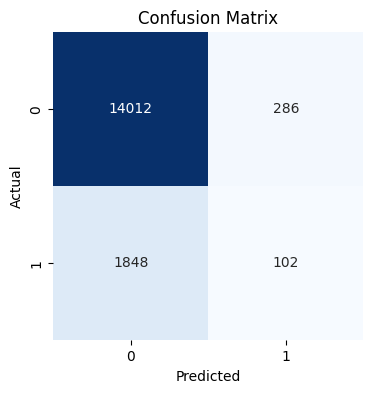

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     14298
           1       0.26      0.05      0.09      1950

    accuracy                           0.87     16248
   macro avg       0.57      0.52      0.51     16248
weighted avg       0.81      0.87      0.83     16248

Accuracy: 0.869
Precision: 0.263
Recall: 0.052
F1-score: 0.087



In [14]:
# Initialize the models
models = {
    
    'Random Forest': RandomForestClassifier()
   
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Random Forest auc: 0.662 +/- 0.004


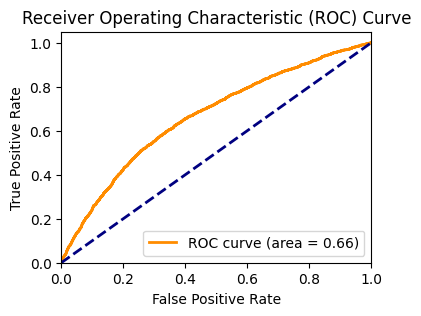

Accuracy (None): 64.64%


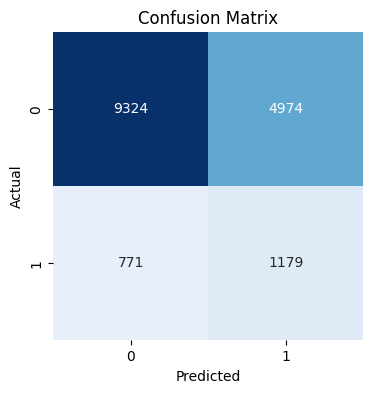

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      0.65      0.76     14298
           1       0.19      0.60      0.29      1950

    accuracy                           0.65     16248
   macro avg       0.56      0.63      0.53     16248
weighted avg       0.84      0.65      0.71     16248

Accuracy: 0.646
Precision: 0.192
Recall: 0.605
F1-score: 0.291



In [19]:
# Initialize the models
models = {
    
    'Random Forest': LogisticRegression(random_state=42, class_weight = 'balanced')
   
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Random Forest auc: 0.641 +/- 0.003


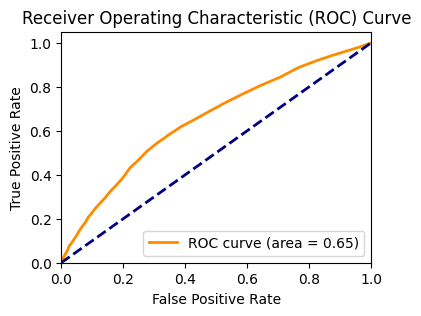

Accuracy (None): 87.83%


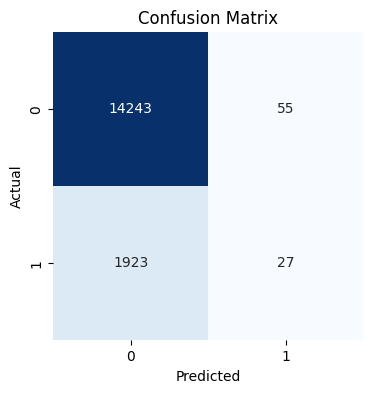

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     14298
           1       0.33      0.01      0.03      1950

    accuracy                           0.88     16248
   macro avg       0.61      0.50      0.48     16248
weighted avg       0.81      0.88      0.83     16248

Accuracy: 0.878
Precision: 0.329
Recall: 0.014
F1-score: 0.027



In [20]:
# Initialize the models
models = {
    
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
   
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Random Forest auc: 0.661 +/- 0.004


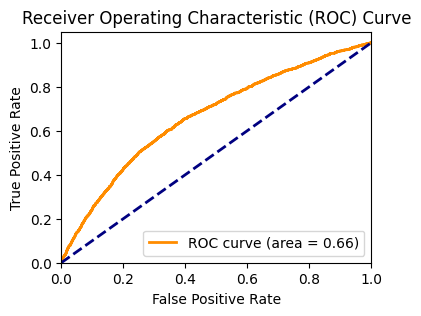

Accuracy (None): 76.76%


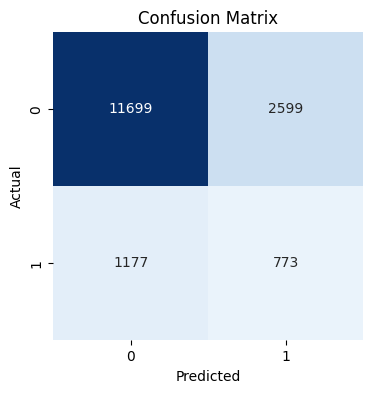

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.91      0.82      0.86     14298
           1       0.23      0.40      0.29      1950

    accuracy                           0.77     16248
   macro avg       0.57      0.61      0.58     16248
weighted avg       0.83      0.77      0.79     16248

Accuracy: 0.768
Precision: 0.229
Recall: 0.396
F1-score: 0.290



In [26]:
# Initialize the models
models = {
    
    'Random Forest': LogisticRegression(random_state=42, class_weight={1: 5, 0: 1})
   
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()